In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
path_root_data = os.path.join('..', 'data','example',)
path_annotations = os.path.join(path_root_data, 'annotations_dir', 'annotations.xml')
path_images_dir = os.path.join(path_root_data, 'images')

In [33]:
path_cropped_images_dir = os.path.join(path_root_data, 'cropped_images')
if not os.path.exists(path_cropped_images_dir):
    os.makedirs(path_cropped_images_dir)

In [3]:
## open xml file
import xml.etree.ElementTree as ET
tree = ET.parse(path_annotations)
root = tree.getroot()

  0%|          | 0/97 [00:00<?, ?it/s]

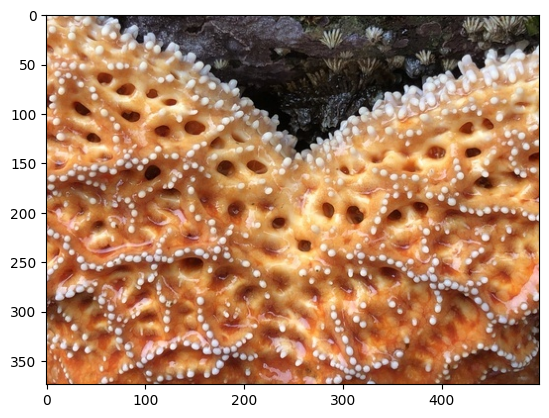

  1%|          | 1/97 [00:00<00:19,  5.05it/s]

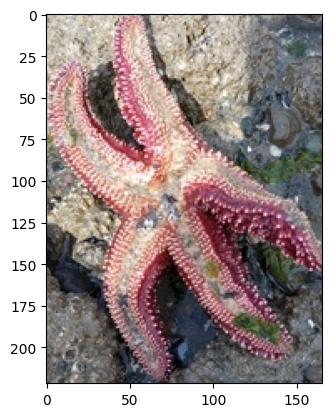

100%|██████████| 97/97 [00:00<00:00, 133.29it/s]


In [34]:
show = True
show_till = 2

verbose = False

## find all the attributes of the xml file and print them
pbar = tqdm(total=len(root.findall('image')), position=0, leave=True)
for i, child in enumerate(root.findall('image')):
    image_name = child.attrib['name']
    image_path = os.path.join(path_images_dir, image_name)
    
    if verbose:
        print('info:', child.tag, child.attrib)
        print(image_path)
        print()
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for j, polygon in enumerate(child.findall('polygon')):
        
        label = polygon.attrib['label']
        annotation = np.array(
            [[float(coord) for coord in point.split(',')] for point in polygon.attrib['points'].split(';')]
        )
        #print(annotation)
        
        ## min, max box
        x_min, y_min = annotation.min(axis=0)
        x_max, y_max = annotation.max(axis=0)
        if verbose:
            print(label)
            print(x_min, y_min, x_max, y_max)
        
        ## crop image
        cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]
        if show and i < show_till:
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.imshow(cropped_image)
            plt.show()
            plt.close()
            
        ## save image
        cropped_image_path = os.path.join(path_cropped_images_dir, f'{label}_{j}_{image_name}')
        cv2.imwrite(cropped_image_path, cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))
            
    pbar.update(1)
pbar.close()
 